# SMOTE on Actual UNO data

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
def conf_matrix(y_val, preds, title):
    # pred = tf.squeeze(test_data["auc_pred"])
    # pred = np.array([1 if x >= 0.5 else 0 for x in pred])
    confusion_matrix = metrics.confusion_matrix(y_val, preds)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    cm_display.ax_.set_title(title)
    plt.show()
    return cm_display

In [3]:
os.chdir("/Users/jakegwinn/Documents/argonne_F24/UNO.jw")
wd = os.getcwd()
datapath = os.path.join(wd, "csa_data/raw_data/y_data/response.tsv")
df = pd.read_csv(datapath, sep="\t")

/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_18543/254425380.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath, sep="\t")


In [4]:
df1 = df.drop(columns=["source", "improve_sample_id", "improve_chem_id", "study"])
df2 = df1.dropna()

In [5]:
df2

,auc,ic50,ec50,ec50se,r2fit,einf,hs,aac1,auc1,dss1
0,0.7153,5.6600,5.6600,0.6867,0.9533,0.0000,0.6669,0.2240,0.7760,0.1661
2,0.4130,7.5460,7.5510,0.0385,0.9948,0.0082,1.3380,0.6909,0.3091,0.6605
3,0.8004,5.1980,5.1980,11.7100,0.9944,0.0000,4.0000,0.0392,0.9608,0.0291
4,0.5071,7.0930,7.1490,0.3175,0.8069,0.0607,1.0150,0.5470,0.4530,0.5037
5,0.5743,7.0040,7.0600,0.0128,0.9989,0.1652,3.1500,0.4675,0.5325,0.4438
...,...,...,...,...,...,...,...,...,...,...
587701,0.5650,6.5640,6.5640,6.4520,0.7647,0.0000,0.4202,0.1615,0.8385,0.0847
587702,0.8664,4.7660,4.7660,2.5700,0.9449,0.0000,1.2590,0.0472,0.9528,0.0196
587705,0.8190,3.0070,3.0070,46.7600,0.4604,0.0000,0.1818,0.1943,0.8057,0.1047
587707,0.9566,0.2428,0.2428,233.0000,0.1946,0.0000,0.2200,0.0438,0.9562,0.0000


In [6]:
print(np.mean(df["auc"] <= 0.4))
print(np.mean(df2["auc"] <= 0.4))

0.022000684011985523
0.035993252309079876


In [7]:
# split into 70:30 ration
X = df2.drop(["auc"], axis=1)
y = df2["auc"] <= 0.4

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (290979, 9)
Number transactions y_train dataset:  (290979,)
Number transactions X_test dataset:  (35924, 9)
Number transactions y_test dataset:  (35924,)


### Logistic Regression

/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_18543/1536397355.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lr.fit(X_train, y_train.ravel())


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     31192
        True       0.93      0.86      0.89      1139

    accuracy                           0.99     32331
   macro avg       0.96      0.93      0.94     32331
weighted avg       0.99      0.99      0.99     32331

[[31113    79]
 [  156   983]]


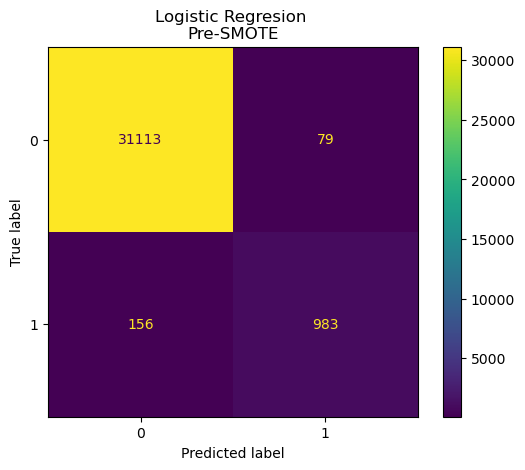

In [8]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_val)

# print classification report
print(classification_report(y_val, predictions))
print(confusion_matrix(y_val, predictions))
cm = conf_matrix(y_val, predictions, "Logistic Regresion \nPre-SMOTE")
cm.figure_.savefig("/Users/jakegwinn/Documents/argonne_F24/u.jw_analysis/AutoEncoder/smote_pics/log_reg_pre.pdf")

### Random Forrest

In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train.ravel())
preds = rf.predict(X_val)

print(classification_report(y_val, preds))

/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_18543/1219419022.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf.fit(X_train, y_train.ravel())


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     31192
        True       0.98      0.98      0.98      1139

    accuracy                           1.00     32331
   macro avg       0.99      0.99      0.99     32331
weighted avg       1.00      1.00      1.00     32331



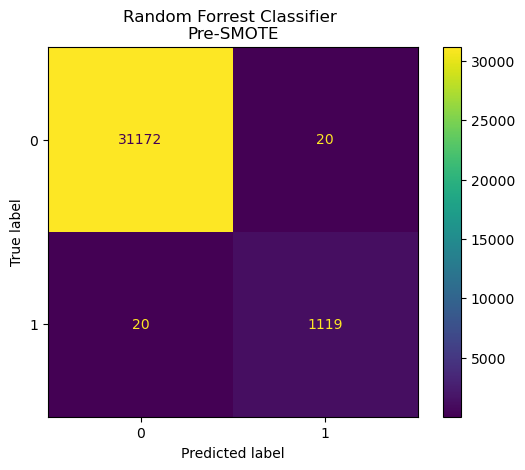

In [10]:
confusion_matrix(y_val, preds)
cm = conf_matrix(y_val, preds, "Random Forrest Classifier \nPre-SMOTE")
cm.figure_.savefig("/Users/jakegwinn/Documents/argonne_F24/u.jw_analysis/AutoEncoder/smote_pics/rand_forr_pre.pdf")

### Naive Bayes

              precision    recall  f1-score   support

       False       1.00      0.84      0.91     31192
        True       0.18      0.96      0.31      1139

    accuracy                           0.85     32331
   macro avg       0.59      0.90      0.61     32331
weighted avg       0.97      0.85      0.89     32331



/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_18543/2444491172.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gnb.fit(X_train, y_train.ravel())


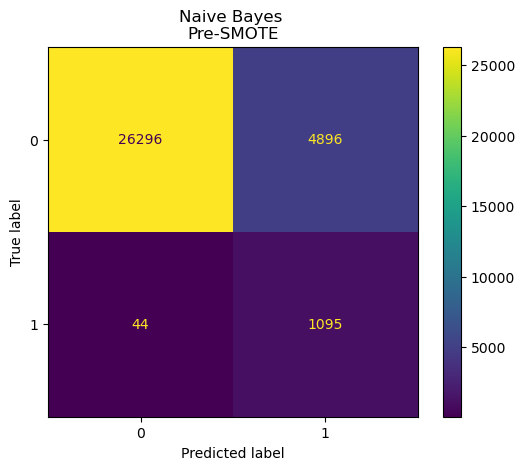

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
preds = gnb.predict(X_val)

print(classification_report(y_val, preds))
confusion_matrix(y_val, preds)
cm = conf_matrix(y_val, preds, "Naive Bayes \nPre-SMOTE")
cm.figure_.savefig("/Users/jakegwinn/Documents/argonne_F24/u.jw_analysis/AutoEncoder/smote_pics/naive_bayes_pre.pdf")

## SMOTE Stuff

In [12]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 10495
Before OverSampling, counts of label '0': 280484 



In [13]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_18543/2503476786.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


After OverSampling, the shape of train_X: (560968, 9)
After OverSampling, the shape of train_y: (560968,) 

After OverSampling, counts of label '1': 280484
After OverSampling, counts of label '0': 280484


### Logistic Regression with Real Data

              precision    recall  f1-score   support

       False       1.00      0.99      0.99     31192
        True       0.72      1.00      0.84      1139

    accuracy                           0.99     32331
   macro avg       0.86      0.99      0.91     32331
weighted avg       0.99      0.99      0.99     32331



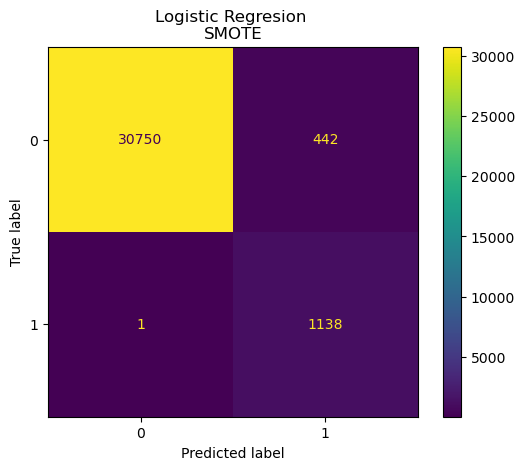

In [14]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_val)

# print classification report
print(classification_report(y_val, predictions))
confusion_matrix(y_val, predictions)
cm = conf_matrix(y_val, predictions, "Logistic Regresion \nSMOTE")
cm.figure_.savefig("/Users/jakegwinn/Documents/argonne_F24/u.jw_analysis/AutoEncoder/smote_pics/log_reg_post.pdf")

### Random Forrest

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res.ravel())
preds = rf.predict(X_val)

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     31192
        True       0.96      1.00      0.98      1139

    accuracy                           1.00     32331
   macro avg       0.98      1.00      0.99     32331
weighted avg       1.00      1.00      1.00     32331



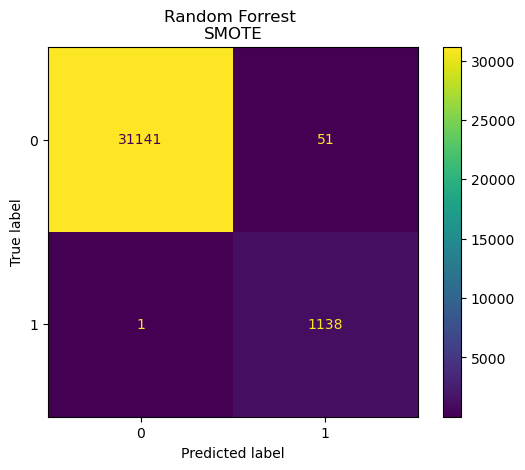

In [16]:
confusion_matrix(y_val, preds)
cm = conf_matrix(y_val, preds, "Random Forrest \nSMOTE")
cm.figure_.savefig("/Users/jakegwinn/Documents/argonne_F24/u.jw_analysis/AutoEncoder/smote_pics/rand_forr_post.pdf")

### Naive Bayes

              precision    recall  f1-score   support

       False       1.00      0.78      0.88     31192
        True       0.14      1.00      0.25      1139

    accuracy                           0.79     32331
   macro avg       0.57      0.89      0.57     32331
weighted avg       0.97      0.79      0.86     32331



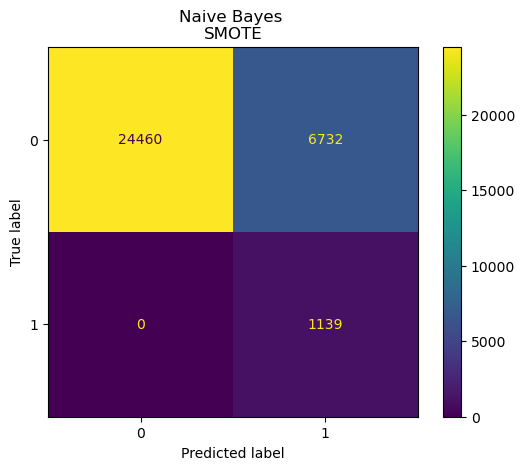

In [17]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res.ravel())
preds = gnb.predict(X_val)

print(classification_report(y_val, preds))
confusion_matrix(y_val, preds)
cm = conf_matrix(y_val, preds, "Naive Bayes \nSMOTE")
cm.figure_.savefig("/Users/jakegwinn/Documents/argonne_F24/u.jw_analysis/AutoEncoder/smote_pics/naive_bayes_post.pdf")